In [1]:
from calibrator import *
from analysis import *
from dobbel import *
import matplotlib.pyplot as plt
dob = dobbellogger()

In [3]:
cali = {'acc rotmat': np.array([[-0.00669934,  1.00001364, -0.00667175],[ 0.78530767,  0.00659274, -0.61567477],[-0.62286734, -0.01254053, -0.75877295]]), 'acc bias': np.array([[-2.69107297e-05],[ 1.06172041e-02],[-1.13834202e-02]]), 'gyro bias': np.array([-0.08444695,  0.49637725, -0.00597818]), 'rot quat gyro': np.array([ 0.23261889,  0.66023109,  0.67386379, -0.23641269])}

In [2]:
cali = calibrate_rot_bias(dob, 1, 1, 400, 2, 125)
print(cali)

Leg de dobbelsteen met nummer  1  boven
Wacht 1 secondes
Logging data for 1s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  2  boven
Wacht 1 secondes
Logging data for 1s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  3  boven
Wacht 1 secondes
Logging data for 1s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  4  boven
Wacht 1 secondes
Logging data for 1s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  5  boven
Wacht 1 secondes
Logging data for 1s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  6  boven
Wacht 1 secondes
Logging data for 1s
Done! The data is located in self.datadf
{'acc rotmat': array([[-0.00669934,  1.00001364, -0.00667175],
       [ 0.78530767,  0.00659274, -0.61567477],
       [-0.62286734, -0.01254053, -0.75877295]]), 'acc bias': array([[-2.69107297e-05],
       [ 1.06172041e-02],
       [-1.13834202e-02]]), 'gyro bias': array([-0.08444695,  0.496

In [4]:
std_cali = {'gyro stds': np.array([0.12881829, 0.09637595, 0.10473001]), 'acc stds': np.array([0.00398812, 0.00299831, 0.00516461])}

In [3]:
std_cali = cali_std(dob, 3, 400, 125)

Leg de dobbelsteen stil
Logging data for 3s
Done! The data is located in self.datadf


In [4]:
print(std_cali)

{'gyro stds': array([0.12881829, 0.09637595, 0.10473001]), 'acc stds': array([0.00398812, 0.00299831, 0.00516461])}


In [18]:
dob.connect()
dob.log(1, 100, 4, 500)
dob.download()
data = dob.datadf

Logging data for 1s
Done! The data is located in self.datadf


In [20]:
data=remove_nan(data)

In [21]:
data.head(200)

,timestamp,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro
0,0.0,-0.047241,0.971680,-0.031982,-0.060976,0.304878,0.411585
1,11.0,-0.050537,0.983887,-0.027588,-0.091463,0.335366,0.670732
2,21.0,-0.050415,0.982422,-0.031494,-0.182927,0.472561,-0.030488
3,31.0,-0.048950,0.981689,-0.027710,-0.228659,0.381098,-0.015244
4,40.0,-0.047607,0.981812,-0.025879,-0.167683,0.396341,0.030488
...,...,...,...,...,...,...,...
83,794.0,-0.048096,0.979858,-0.030518,-0.213415,0.487805,-0.060976
84,805.0,-0.048340,0.979614,-0.027588,-0.106707,0.548781,-0.045732
85,815.0,-0.046143,0.982056,-0.028076,0.015244,0.503049,0.106707
86,825.0,-0.046997,0.980957,-0.029541,-0.076220,0.457317,0.137195


In [32]:
lijst = [1, 2, 3, 4, 5]
print(lijst[len(lijs):])

[4, 5]


In [23]:
print(side)

3


In [15]:
results = run_analysis_local(data, cali, std_cali, N=5, gamma=0.005)
total_raap_duration = results.loc[0, 'Raap tijd']
total_gooi_duration = results.loc[0, 'Gooi tijd']
total_lucht_duration = results.loc[0, 'Lucht tijd']
start_tot_loslaten = results.loc[0, 'Start tot los']
start_tot_grond = results.loc[0, 'Start tot grond']
laatste_zijde = results.loc[0, 'Laatste zijde']
print("Dobbel tijd oprapen = ", total_raap_duration)
print("Dobbel tijd van oprapen tot loslaten = ", total_gooi_duration)
print("Dobbel tijd in de lucht = ", total_lucht_duration)
print("Dobbel tijd tot loslaten vanaf begin programma = ", start_tot_loslaten)
print("Zijde omhoog = ", laatste_zijde)

0.01
0.015
0.02
0.025
0.030000000000000002
0.035
0.04
0.045
0.049999999999999996
Dobbel tijd oprapen =  735.0
Dobbel tijd van oprapen tot loslaten =  2453.0
Dobbel tijd in de lucht =  70.0
Dobbel tijd tot loslaten vanaf begin programma =  3188.0
Zijde omhoog =  2.0


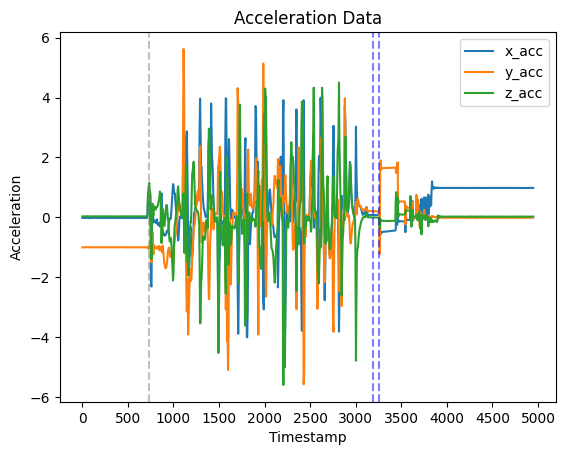

In [16]:
# Assume data is already defined
df = results

# Plot the accelerometer values
columns_to_plot = [col for col in df.columns if 'acc' in col]
df.plot(x='timestamp', y=columns_to_plot, kind='line')

# Vertical gray line for when the dice is picked up
plt.axvline(x=total_raap_duration, color='gray', linestyle='--', alpha=0.5, label='Start to Pickup')

# Vertical red line for when the dice leaves the hand
plt.axvline(x=start_tot_loslaten, color='blue', linestyle='--', alpha=0.5, label='Start to Release')

# Vertical blue line for when the dice hits the ground
plt.axvline(x=start_tot_grond, color='blue', linestyle='--', alpha=0.5, label='Start to Ground')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.title('Acceleration Data')

# Set x-axis grid with a spacing of 500 units
plt.xticks(range(int(df['timestamp'].min()), int(df['timestamp'].max()) + 500, 500))

# Show the plot
plt.show()

In [14]:
dob.disconnect()


we are disconnected!


In [9]:
print(data)

      timestamp     x_acc     y_acc     z_acc    x_gyro    y_gyro    z_gyro
0           0.0 -0.641968 -0.034302 -0.820923       NaN       NaN       NaN
1           3.0 -0.647095 -0.034058 -0.830322       NaN       NaN       NaN
2           4.0 -0.644531 -0.036011 -0.826416       NaN       NaN       NaN
3           7.0 -0.644775 -0.033813 -0.829712       NaN       NaN       NaN
4          10.0 -0.643921 -0.032104 -0.827271       NaN       NaN       NaN
...         ...       ...       ...       ...       ...       ...       ...
1962     4834.0 -0.030273  0.969727 -0.032104 -0.304878  0.442073 -0.015244
1963     4837.0 -0.034546  0.969116 -0.027710 -0.167683  0.472561 -0.060976
1964     4840.0 -0.033813  0.977051 -0.024902  0.030488  0.487805 -0.076220
1965     4841.0       NaN       NaN       NaN -0.182927  0.442073 -0.076220
1966     4844.0       NaN       NaN       NaN -0.320122  0.655488 -0.076220

[1967 rows x 7 columns]
